In [6]:
#!pip install chembl_webresource_client

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
### Task 1 ###
from chembl_webresource_client.new_client import new_client
drug = new_client.drug
#get all drugs, which are in phase 4 (approved drugs)
approved_drugs = drug.filter(max_phase=4).order_by('first_approval')
print("Number of approved drugs:", len(approved_drugs))

Number of approved drugs: 3137


In [52]:
#extract the idea, names and year and create a list for each
ChemblID = [x['molecule_chembl_id'] for x in approved_drugs]
names = [next((synonym['molecule_synonym'] for synonym in x['molecule_synonyms'] if synonym['syn_type'] == 'FDA'), 'N/A') for x in approved_drugs]
years = [x['first_approval'] for x in approved_drugs]

#create a panda dataframe with the three lists and sort them
df = pd.DataFrame({'Chembl_ID': ChemblID, 'Name': names, 'First approval year': years})
df_sorted = df.sort_values(by=['First approval year', 'Name'])
df_sorted.reset_index(drop=True, inplace=True)
print(df_sorted)

          Chembl_ID           Name  First approval year
0         CHEMBL449   Butabarbital               1939.0
1         CHEMBL821      Guanidine               1939.0
2          CHEMBL90      Histamine               1939.0
3         CHEMBL700            N/A               1939.0
4     CHEMBL1201657            N/A               1939.0
...             ...            ...                  ...
3132      CHEMBL859     Oxypurinol                  NaN
3133     CHEMBL1412     Piperazine                  NaN
3134      CHEMBL403      Sulbactam                  NaN
3135     CHEMBL1760    Terbutaline                  NaN
3136      CHEMBL428  Trovafloxacin                  NaN

[3137 rows x 3 columns]


In [53]:
### Task 2 ###
df_14 = df[df['First approval year'] >= 2014]
ChemblID14 = df_14["Chembl_ID"].tolist()
activities = new_client.activity

target = new_client.target
data = []
#for i in range(len(ChemblID14):
for i in range(15):  #used to test everything, otherwise the execution time is too long
    #extract target ID
    res = activities.filter(molecule_chembl_id__in = ChemblID14[i]).only(["molecule_chembl_id","target_chembl_id"])
    TID = [item['target_chembl_id'] for item in res]
    #extract Target Components
    UniProt = target.filter(target_chembl_id__in = TID).only(['target_components'])
    #extraxt accession values
    accession_values = [component['accession'] for item in UniProt for component in item.get('target_components', [])]
    row_data = {'ChemblID': ChemblID14[i], 'AccessionValues': accession_values}
    data.append(row_data)

df = pd.DataFrame(data)
print(df)
    

         ChemblID                                    AccessionValues
0   CHEMBL2103827  [P00734, P03372, P06401, P08172, P08908, P0891...
1   CHEMBL1083659  [P03372, P04150, P06401, P07550, P08172, P0858...
2    CHEMBL605846  [P00533, P03372, P04150, P06401, P07550, P0817...
3    CHEMBL502835  [P00519, P00533, P03372, P04150, P06213, P0640...
4    CHEMBL493982  [P00519, P00734, P03372, P06401, P07550, P0817...
5    CHEMBL521686  [P03372, P04150, P06401, P07550, P08172, P0858...
6    CHEMBL514800  [P00533, P03372, P04150, P06401, P07550, P0817...
7    CHEMBL408513  [P00734, P03372, P04150, P06401, P07550, P0817...
8    CHEMBL256997  [P00734, P03372, P06401, P07550, P08172, P0890...
9    CHEMBL373742  [P00734, P03372, P06401, P08172, P08908, P0891...
10   CHEMBL218650  [P00734, P03372, P04150, P06401, P07550, P0817...
11   CHEMBL443052  [P00734, P00918, P03372, P06401, P08172, P0890...
12   CHEMBL206253  [P00519, P07550, P08913, P30556, P25103, P4984...
13  CHEMBL1201692                 

In [44]:
## Task3 ##
import requests
import json

unique_keywords = {}

url = 'https://www.ebi.ac.uk/proteins/api/proteins?offset=0&size=100&accession='
acc = df["AccessionValues"].tolist()
#go trough all accessions
for x in acc:
    y = ','.join(x)
    #get the data frome the API
    r = requests.get(url + y, headers={'Accept': 'application/json'})
    lst = json.loads(r.text)
    #extract very complicated all keywords
    if lst and isinstance(lst, list) and lst[0] and "keywords" in lst[0]:
        keywords = lst[0].get("keywords", [])
        if keywords:
            #store keywords in dictionarry and the occurence
            for item in keywords:
                if item['value'] in unique_keywords:
                    unique_keywords[item['value']] += 1
                else:
                    unique_keywords[item['value']] = 1
                    
#print all keywords and their ocurence            
for keyword, count in unique_keywords.items():
    print(f"{keyword}: {count}")

3D-structure: 9
Activator: 2
Alternative splicing: 8
DNA-binding: 2
Metal-binding: 3
Nucleus: 2
Receptor: 7
Reference proteome: 10
Transcription: 2
Transcription regulation: 2
Zinc: 2
Zinc-finger: 2
Cell membrane: 7
Disulfide bond: 7
G-protein coupled receptor: 5
Glycoprotein: 8
Membrane: 8
Transducer: 5
Transmembrane: 7
Transmembrane helix: 7
Blood coagulation: 2
Hemostasis: 2
Signal: 2
ATP-binding: 2
Lipid transport: 1
Nucleotide-binding: 2
Phosphoprotein: 2
Repeat: 2
Translocase: 1
Transport: 1
Acute phase: 1
Calcium: 2
Cleavage on pair of basic residues: 1
Direct protein sequencing: 1
Disease variant: 1
Gamma-carboxyglutamic acid: 1
Hydrolase: 2
Kringle: 1
Pharmaceutical: 1
Protease: 1
Secreted: 1
Serine protease: 1
Thrombophilia: 1
Zymogen: 1
Cell cycle: 1
Cell division: 1
Cell projection: 1
Cilium: 1
Cilium biogenesis/degradation: 1
Cytoplasm: 1
Cytoskeleton: 1
Isopeptide bond: 1
Kinase: 1
Microtubule: 1
Mitosis: 1
Proto-oncogene: 1
Serine/threonine-protein kinase: 1
Transferase:

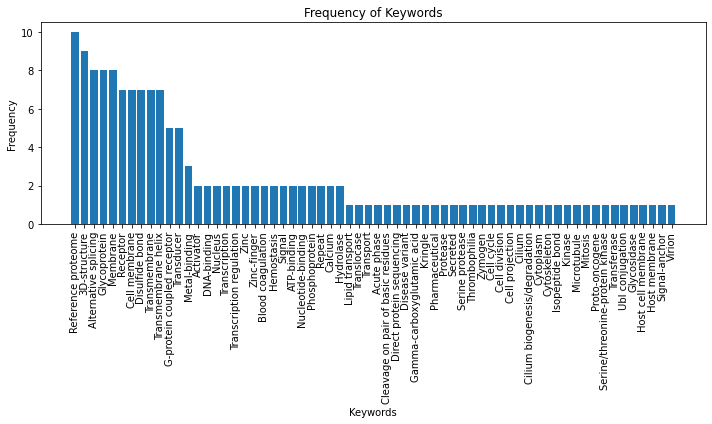

In [48]:
sorted_keywords = sorted(unique_keywords.items(), key=lambda x: x[1], reverse=True)
keywords, counts = zip(*sorted_keywords)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(keywords, counts)
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.title('Frequency of Keywords')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()